# **Diplomado IA: Aplicaciones 1 - NLP**. <br> Práctico 2: Word Embeddings
---
---

**Profesor:** Pablo Messina (pamessina@uc.cl)

---
---

# **Instrucciones Generales**


El siguiente práctico es **individual**. El formato de entrega es el **archivo .ipynb con todas las celdas ejecutadas**. Todas las preguntas deben ser respondidas en las celdas dispuestas para ello. No se aceptará el _output_ de una celda de código como respuesta.

Este práctico cuenta con varias secciones y en varias de ellas se incluye actividades a realizar.

**IMPORTANTE: habrá un bonus de 1 décima para todos aquellos alumnos/as que muestren buen orden en sus respuestas (esto aplica a legibilidad de código, buena redacción, formalidad, organización del jupyter notebook, seguimiento de instrucciones, etc). El criterio lo pondrá cada ayudante corrector. La nota máxima obtenible en el laboratorio es 7.0**

# **Importamos librerías a usar**

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 932.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

**Importante**: Luego de instalar `gensim`, se recomienda reiniciar el entorno de ejecución para asegurar la correcta carga de las bibliotecas actualizadas.

In [ ]:
import re
import gdown
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import gensim
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Descargamos Word2vec pre-entrenado**

In [ ]:
# url = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
# url = 'https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
url = 'https://drive.google.com/uc?id=1JSZ_T94Kq0AbKC7qXiIqZKDe3xpBuySe'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1JSZ_T94Kq0AbKC7qXiIqZKDe3xpBuySe
From (redirected): https://drive.google.com/uc?id=1JSZ_T94Kq0AbKC7qXiIqZKDe3xpBuySe&confirm=t&uuid=e0a45671-fa14-473d-ae86-cb7b3b47b4d6
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:36<00:00, 44.6MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
google_wordvecs = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=100000)

# **Analogías con Word2vec**
## (Álgebra de vectores con interpretación semántica)

Inspirado y basado en: https://github.com/dccuchile/spanish-word-embeddings/blob/master/examples/Ejemplo_WordVectors.ipynb

Ejemplo de uso: most_similar_cosmul(positive=lista_palabras_positivas, negative=lista_palabras_negativas)

Esta llamada encuentra las palabras del vocabulario que están más cercanas a las palabras en listas_palabras_positivas y no estén cercanas a lista_palabras_negativas (para una formalización del procedimiento, ver la fórmula (4) en la Sección 6 de este [artículo](http://www.aclweb.org/anthology/W14-1618)).

Cuando lista_palabras_positivas contiene dos palabras, digamos a y b_p, y lista_palabras_negativas contiene una palabra, digamos a_p, el anterior procedimiento se lee coloquialmente como el encontrar la palabra b que responde a la pregunta: a_p es a a como b_p es a ???. El ejemplo clásico se tiene cuando a es rey, b_p es mujer, y a_p es hombre. La palabra buscada b es reina, pues hombre es a rey como mujer es a reina.

In [ ]:
google_wordvecs.most_similar_cosmul(positive=['woman','king'], negative=['queen'])

[('man', 0.9307777285575867),
 ('boy', 0.8291134238243103),
 ('motorcyclist', 0.7735416293144226),
 ('teenage_girl', 0.7693272233009338),
 ('teenager', 0.7692983746528625),
 ('taxi_driver', 0.7674799561500549),
 ('girl', 0.7596036195755005),
 ('victim', 0.7527119517326355),
 ('bicyclist', 0.7488752603530884),
 ('father', 0.7468025088310242)]

In [ ]:
google_wordvecs.most_similar_cosmul(positive=['actor','woman'],negative=['man'])

[('actress', 1.0588080883026123),
 ('actresses', 0.9304280281066895),
 ('Best_Actress', 0.8946203589439392),
 ('Actress', 0.8936436772346497),
 ('comedienne', 0.8506139516830444),
 ('Best_Supporting_Actress', 0.8503092527389526),
 ('actors', 0.8433448076248169),
 ('Paltrow', 0.8427857160568237),
 ('Heigl', 0.8372300267219543),
 ('Golden_Globe', 0.8350875973701477)]

In [ ]:
google_wordvecs.most_similar_cosmul(positive=['son','woman'],negative=['man'])

[('daughter', 1.053764820098877),
 ('mother', 1.0130525827407837),
 ('niece', 0.9732571840286255),
 ('eldest_daughter', 0.9666094779968262),
 ('granddaughter', 0.95781010389328),
 ('husband', 0.956787109375),
 ('daughters', 0.9557827115058899),
 ('sister', 0.9450976252555847),
 ('father', 0.9181194305419922),
 ('wife', 0.9142286777496338)]

In [ ]:
google_wordvecs.most_similar_cosmul(positive=['play','singing'],negative=['sing'])

[('playing', 0.9153854846954346),
 ('played', 0.8183861374855042),
 ('game', 0.8155624866485596),
 ('plays', 0.8033236861228943),
 ('Playing', 0.7878930568695068),
 ('games', 0.7651411294937134),
 ('scoring', 0.7445952892303467),
 ('physicality', 0.7320943474769592),
 ('Play', 0.728746771812439),
 ('playmaking', 0.7280517220497131)]

In [ ]:
google_wordvecs.most_similar_cosmul(positive=['play','sang'],negative=['sing'])

[('played', 0.9050213694572449),
 ('playing', 0.8536635637283325),
 ('plays', 0.8203080296516418),
 ('Playing', 0.7951124310493469),
 ('game', 0.7891286015510559),
 ('Played', 0.7801413536071777),
 ('played_sparingly', 0.7400324940681458),
 ('games', 0.737052321434021),
 ('outplayed', 0.7354370951652527),
 ('ball', 0.7341139316558838)]

In [ ]:
google_wordvecs.most_similar_cosmul(positive=['Santiago','Venezuela'],negative=['Chile'])

[('Caracas', 0.9518518447875977),
 ('Ramírez', 0.9386518597602844),
 ('Peña', 0.9186561703681946),
 ('Chavez', 0.9147828221321106),
 ('Rodríguez', 0.9133160710334778),
 ('Martinez', 0.9109025001525879),
 ('Ramirez', 0.9093917608261108),
 ('Ortiz', 0.9087135791778564),
 ('Venezuelan', 0.9070562124252319),
 ('Martínez', 0.9041159749031067)]

In [ ]:
google_wordvecs.most_similar_cosmul(positive=['Buenos_Aires','Chile'],negative=['Santiago'])

[('Argentina', 1.0106027126312256),
 ('Brazil', 0.9226211905479431),
 ('Uruguay', 0.8886619210243225),
 ('Chilean', 0.8861171007156372),
 ('Argentine', 0.879367470741272),
 ('Argentines', 0.8666806221008301),
 ('Peru', 0.8634063005447388),
 ('Paraguay', 0.863052248954773),
 ('Bolivia', 0.8587836623191833),
 ('President_Nestor_Kirchner', 0.8434462547302246)]

**Actividad 1**

Use su creatividad y genere 3 ejemplos adicionales de analogías, distintos a los vistos arriba (piense en otros temas, por ej. música, deportes, etc.).

Luego comente los resultados que obtuvo. ¿Funcionaron las analogías como usted esperaba? ¿Sí, no, por qué? ¿Le hacen sentido las top 10 palabras? ¿Hay alguna palabra que no le hace sentido?

Utilice las 3 celdas abajo para generar sus ejemplos.

NOTA: se recomienda hacerlo con palabras en inglés.

**Comente aquí sus ejemplos**: (doble click para editar)

# **Word vectors en términos excluídos**

Ejemplo de uso: doesnt_match(lista_palabras)

Esta llamada selecciona la palabra dentro de listas_palabras que está más lejana del resto de las palabras de la lista. La distancia es simplemente el ángulo entre las direcciones de los vectores de las palabras.

In [ ]:
google_wordvecs.doesnt_match(['white','blue','red','Chile'])

'Chile'

In [ ]:
google_wordvecs.doesnt_match(['Sun','Moon','lunch','Jupiter'])

'lunch'

In [ ]:
google_wordvecs.doesnt_match(['April', 'May', 'September', 'Tuesday', 'July'])

'Tuesday'

In [ ]:
google_wordvecs.doesnt_match(['Monday', 'Tuesday', 'September', 'Thursday', 'Friday'])

'September'

In [ ]:
google_wordvecs.doesnt_match(['Lima', 'Paris', 'London', 'Madrid'])

'Lima'

**Actividad 2**

Use su creatividad y genere 3 ejemplos adicionales de términos excluídos, distintos a los vistos arriba (piense en otros temas, por ej. música, deportes, etc.).

Luego comente los resultados que obtuvo. ¿Le funcionaron sus ejemplos como usted esperaba? ¿Sí, no, por qué?

Utilice las 3 celdas abajo para generar sus ejemplos.

**Comente aquí sus ejemplos**: (doble click para editar)


# **Visualizando Word Embeddings**

Proyectamos los word vectors a un plano 2D usando reducción de dimensionalidad con PCA

In [ ]:
vectors_2d = PCA(n_components=2).fit_transform(google_wordvecs.vectors)

Recolectamos todas las palabras del vocabulario en una lista

In [ ]:
all_words = google_wordvecs.index_to_key

Funciones para generar scatter plots de word vectors con sus respectivas palabras en un plano 2D

In [ ]:
# Esta función escoge palabras del vocabulario de manera aleatoria
def plot_word_embeddings_2d_random(words, embeddings, n_samples):
  n = len(words)
  indices = random.sample(range(n), n_samples)
  X = [embeddings[i][0] for i in indices]
  Y = [embeddings[i][1] for i in indices]
  plt.figure(figsize=(15,9))
  plt.scatter(X, Y, linewidths=5, color='blue')
  plt.xlabel("PC1",size=15)
  plt.ylabel("PC2",size=15)
  plt.title("Word Embedding Space", size=20)
  for i in range(n_samples):
    plt.annotate("  " + words[indices[i]], xy=(X[i],Y[i]))
  plt.show()

# Esta función recibe de forma explícita las palabras
def plot_word_embeddings_2d(words, key_to_index, embeddings):
  indices = [key_to_index[w] for w in words]
  X = [embeddings[i][0] for i in indices]
  Y = [embeddings[i][1] for i in indices]
  plt.figure(figsize=(15,9))
  plt.scatter(X, Y, linewidths=5, color='blue')
  plt.xlabel("PC1",size=15)
  plt.ylabel("PC2",size=15)
  plt.title("Word Embedding Space", size=20)
  for i, word in enumerate(words):
    plt.annotate("  " + word, xy=(X[i],Y[i]))
  plt.show()

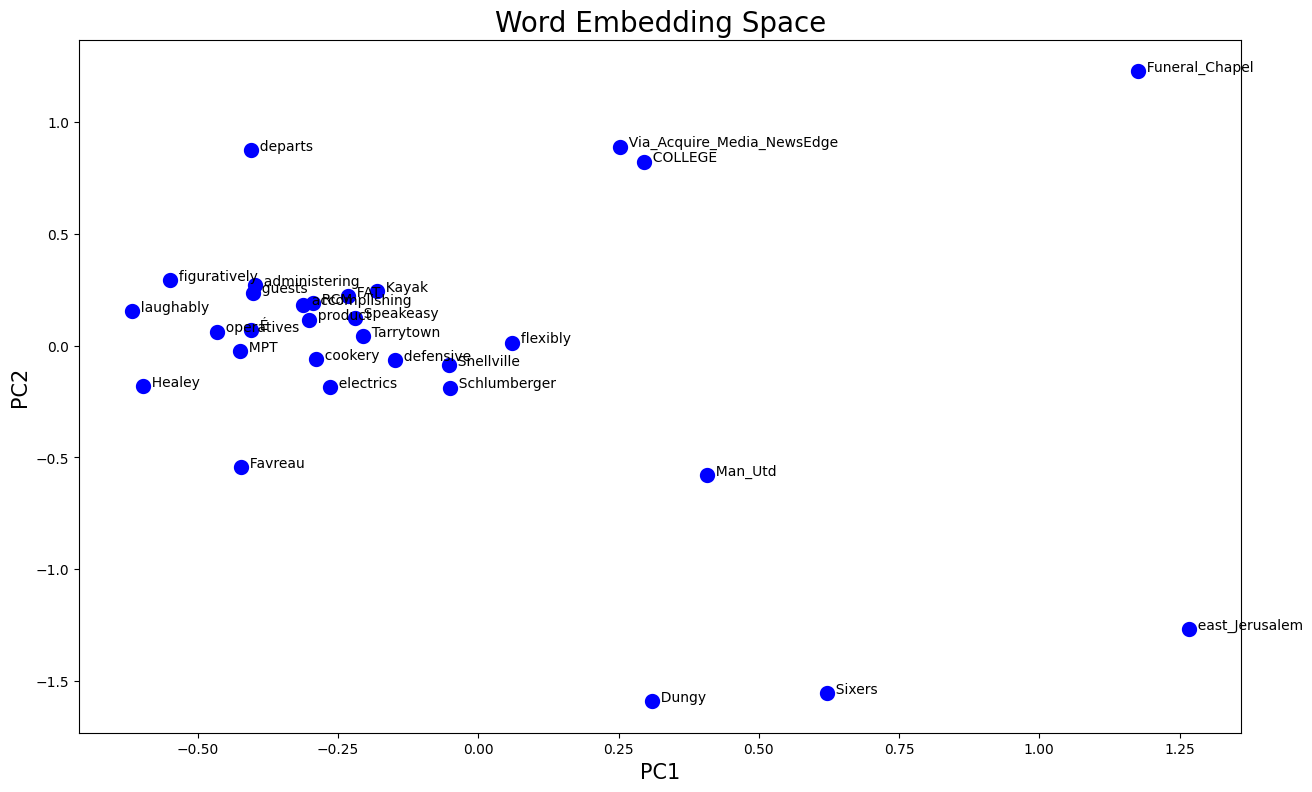

In [ ]:
plot_word_embeddings_2d_random(all_words, vectors_2d, 30)

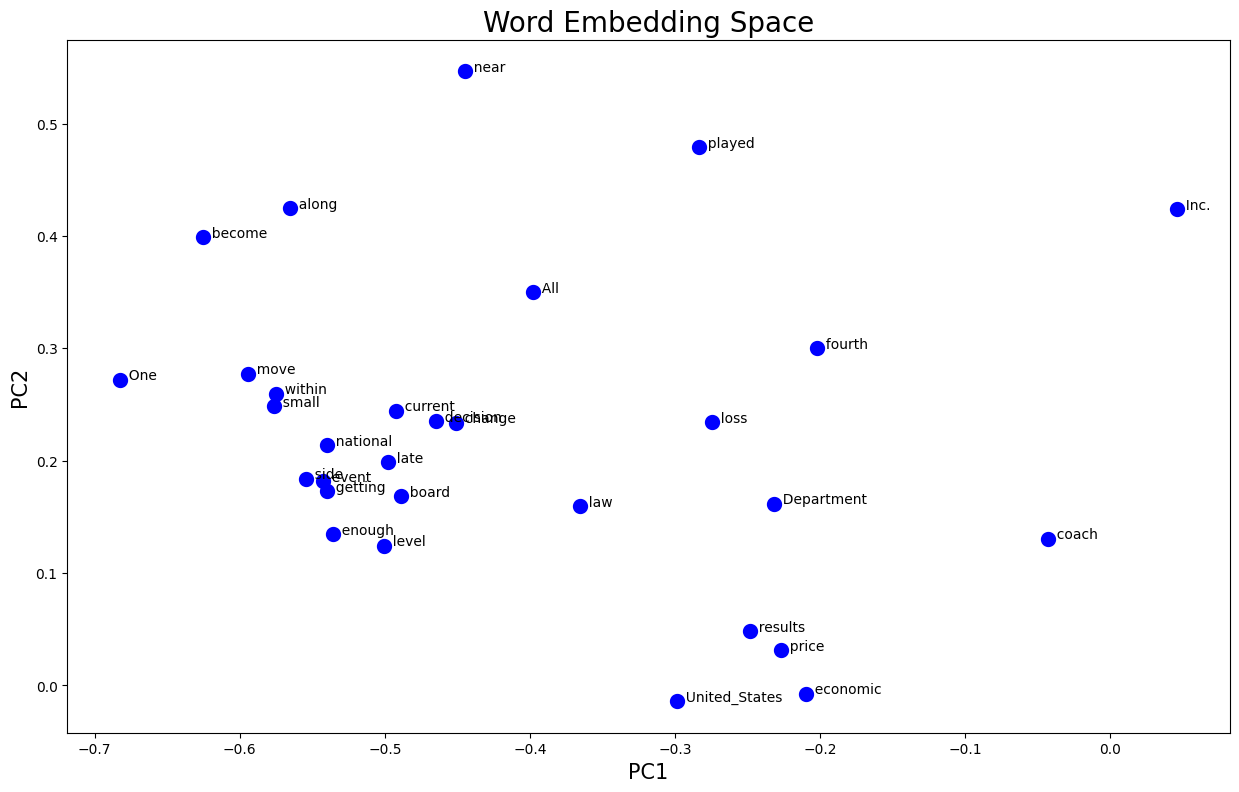

In [ ]:
plot_word_embeddings_2d(all_words[400:430], google_wordvecs.key_to_index, vectors_2d)

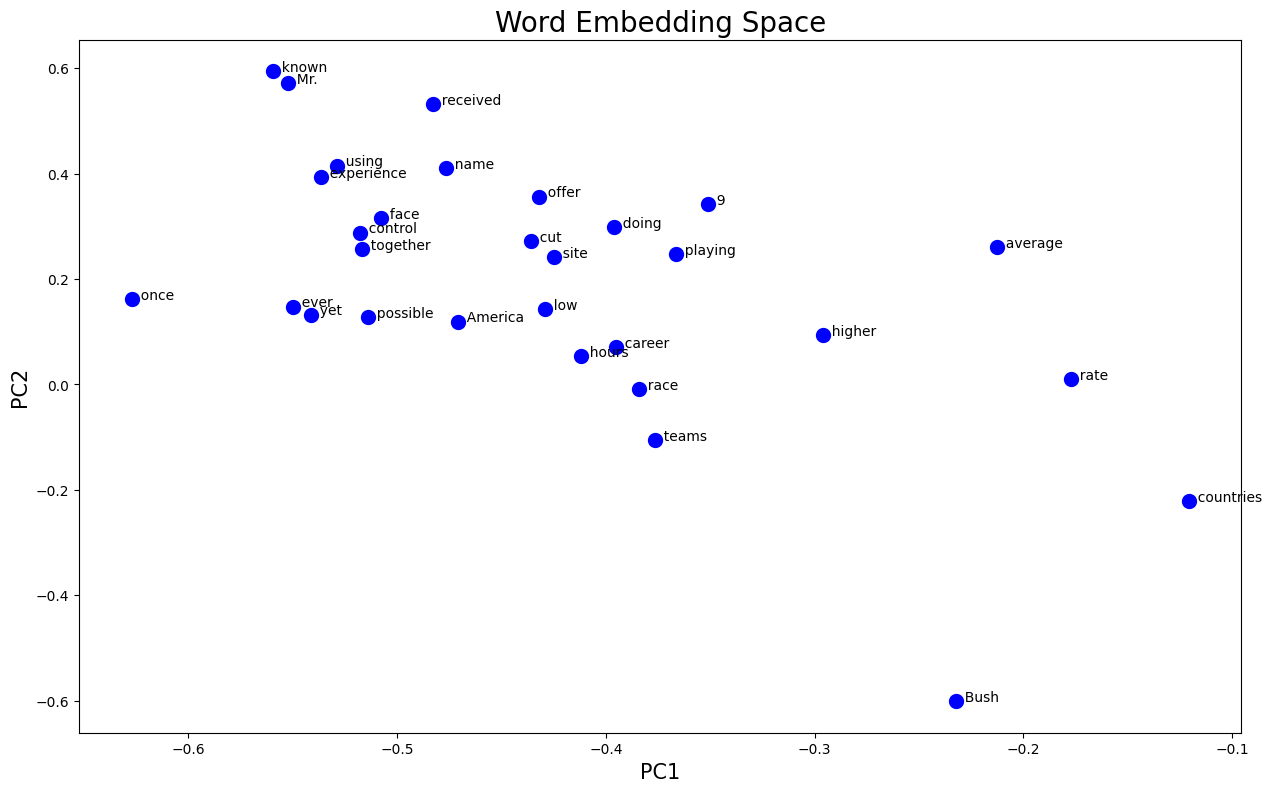

In [ ]:
plot_word_embeddings_2d(all_words[500:530], google_wordvecs.key_to_index, vectors_2d)

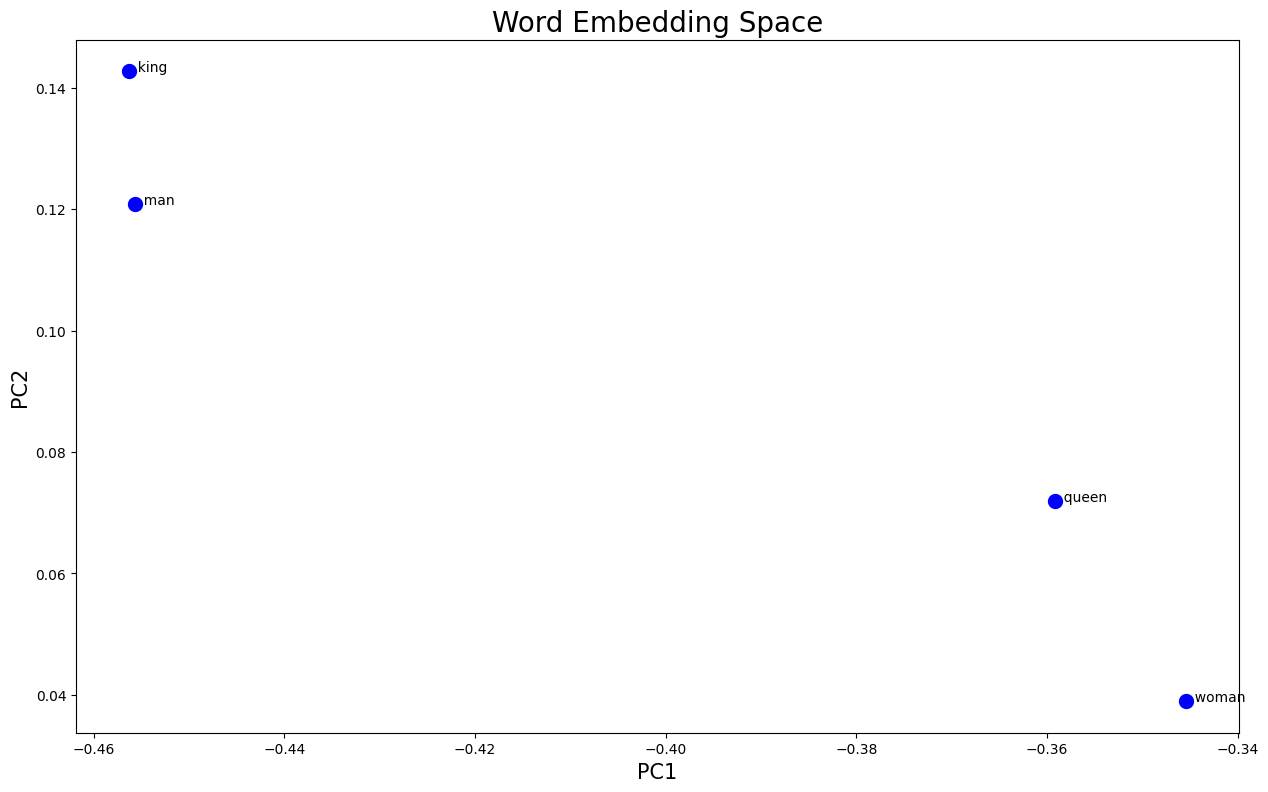

In [ ]:
plot_word_embeddings_2d(["queen", "king", "woman", "man"], google_wordvecs.key_to_index, vectors_2d)

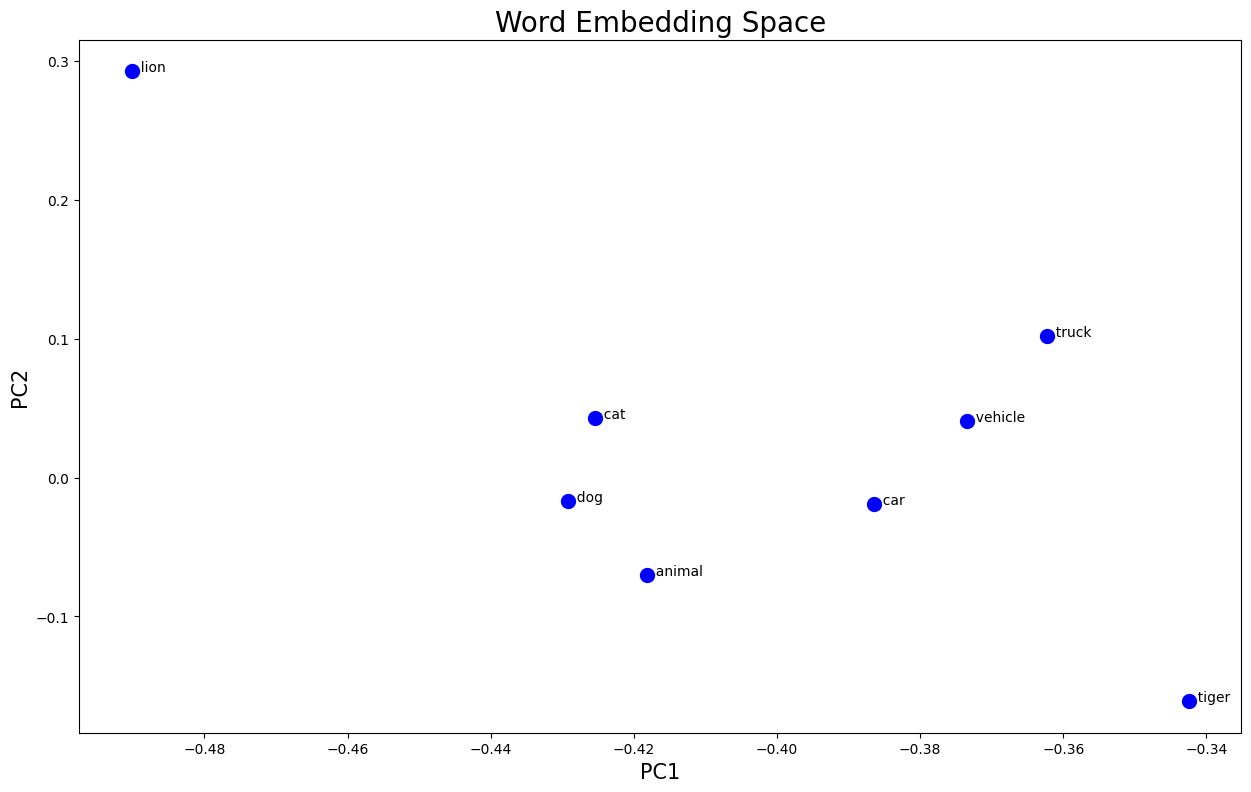

In [ ]:
plot_word_embeddings_2d(["dog", "cat", "animal", "lion", "tiger", "car", "truck", "vehicle"], google_wordvecs.key_to_index, vectors_2d)

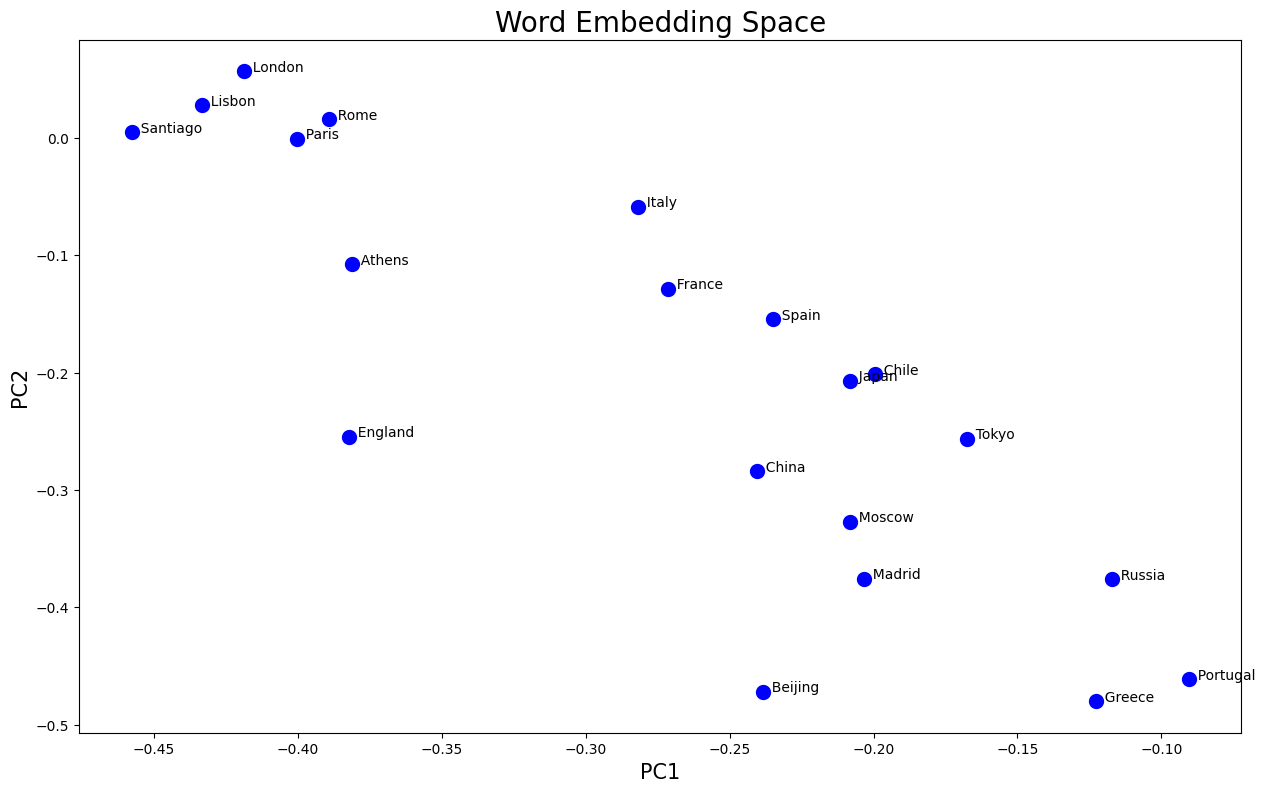

In [ ]:
words = [
         "Chile", "Santiago",
         "England", "London",
         "France", "Paris",
         "China", "Beijing",
         "Russia", "Moscow",
         "Japan", "Tokyo",
         "Spain", "Madrid",
         "Portugal", "Lisbon",
         "Italy", "Rome",
         "Greece", "Athens",
         ]
plot_word_embeddings_2d(words, google_wordvecs.key_to_index, vectors_2d)

**Actividad 3**

Use su creatividad y genere 3 gráficos adicionales que le parezcan interestantes, distintos a los vistos arriba (piense en otros temas, por ej. música, deportes, etc.).

Luego comente los resultados que obtuvo. ¿Tienen sentido sus gráficos? ¿Hay cosas que le llaman la atención o no le hacen sentido? ¿Sí, no, por qué?

Utilice las 3 celdas abajo para generar sus gráficos.

**Comente aquí sus gráficos**: (doble click para editar)

**Actividad 4 (teórica)**

Responda la siguiente pregunta:

**Pregunta**: ¿Cuál cree usted que sea la explicación de la propiedad de álgebra semántica demostrada por word embeddings como Word2vec? ¿A qué se deberá que operando algebráicamente con vectores de palabras podamos hacer analogías, detectar términos excluídos, entre otras cosas?

Esta pregunta no es sencilla, por lo que se le sugiere investigar en internet y resumir en sus palabras lo que logre entender. Puede consultar el material que usted estime conveniente, desde un video en YouTube hasta un paper si así lo desea.

Recuerde citar el material consultado.

**Su respuesta**: (doble click para editar)

# **Análisis de Sentimiento de Tweets usando Word embeddings**

Inspirado en: https://github.com/tthustla/twitter_sentiment_analysis_part1

Descargamos el dataset de tweets

In [ ]:
!wget https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

--2025-05-14 16:29:05--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: ‘trainingandtestdata.zip’

trainingandtestdata 100%[===================>]  77.59M  18.5MB/s    in 4.2s    

2025-05-14 16:29:10 (18.5 MB/s) - ‘trainingandtestdata.zip’ saved [81363704/81363704]



In [ ]:
!unzip trainingandtestdata.zip

Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
!ls

GoogleNews-vectors-negative300.bin.gz
sample_data
testdata.manual.2009.06.14.csv
training.1600000.processed.noemoticon.csv
trainingandtestdata.zip


Cargamos el csv de entrenamiento en un dataframe de pandas

In [ ]:
df_train = pd.read_csv('./training.1600000.processed.noemoticon.csv',
                       header=None,
                       names=['sentiment','id','date','query_string','user','text'],
                       encoding = "ISO-8859-1")
df_train.drop(['id','date','query_string','user'], axis=1, inplace=True)

Lo inspeccionamos un poquito:

In [ ]:
df_train

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


Definimos una funcion para limpiar tweets y aprovechar de borrar stopwords

In [ ]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
tok = WordPunctTokenizer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    words = [w for w in words if w not in stop_words]
    return (" ".join(words)).strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Probamos nuestra función con algunos ejemplos para ver cómo quedan:

In [ ]:
for x in [279, 343, 0, 226, 175]:
  print('-------')
  print(df_train.text[x])
  print(tweet_cleaner(df_train.text[x]))

-------
Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. 
whinging client boss understand english well rewrote text unreadable written v good writer reviewed correctly
-------
@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down 
fun furious new mantra bay breakers getting rambunctious city overreacted clamped
-------
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
awww bummer shoulda got david carr third day
-------
Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers 
tuesday start reflection n lecture stress reducing techniques sure might become useful us accompaniers
-------
@machineplay I'm so sorry you're having to go through this. Again.  #t

<ipython-input-46-f827c4209ff3>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Definimos una función para limpiar un dataframe completo:

In [ ]:
def clean_dataframe(df, print_every=10000):
  clean_tweet_texts = []
  for i in range(len(df)):
      if (i+1)%print_every == 0 or i+1 == len(df):
          print("Tweets %d of %d have been processed" % (i+1, len(df)))
      clean_tweet_texts.append(tweet_cleaner(df.text.iloc[i]))
  df_clean = pd.DataFrame(clean_tweet_texts, columns=['text'])
  df_clean['target'] = df.sentiment
  return df_clean

Dado que el set de entrenamiento consiste de 1.6 M de instancias, por motivos de tiempo y para fines ilustrativos sampleamos un subconjunto razonable:

In [ ]:
df_sample = df_train.sample(random_state=1, n=20000)
df_sample.reset_index(inplace=True)
df_sample

,index,sentiment,text
0,514293,0,i miss nikki nu nu already shes always there ...
1,142282,0,So I had a dream last night. I remember a sig...
2,403727,0,@girlyghost ohh poor sickly you (((hugs)) ho...
3,649503,0,it is raining again
4,610789,0,@MissKeriBaby wish I was in LA right now
...,...,...,...
19995,1200592,4,I get the worst writer's cramp. These thank yo...
19996,333050,0,@ladyinreddress the sun is all gone now...
19997,893698,4,"FINALLY a break till Wed, no work OR school, b..."
19998,1145456,4,I want a Blackberry...


Limpiamos nuestro dataframe de entrenamiento:

In [ ]:
df_samp_clean = clean_dataframe(df_sample)
df_samp_clean

<ipython-input-46-f827c4209ff3>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Tweets 10000 of 20000 have been processed
Tweets 20000 of 20000 have been processed


,text,target
0,miss nikki nu nu already shes always needed th...,0
1,dream last night remember sign clearly told ge...,0
2,ohh poor sickly hugs hope feel little better soon,0
3,raining,0
4,wish la right,0
...,...,...
19995,get worst writer cramp thank notes killing hand,4
19996,sun gone,0
19997,finally break till wed work school hectic yay ...,4
19998,want blackberry,4


Cargamos y limpiamos el dataset de test:

In [ ]:
df_test = pd.read_csv('./testdata.manual.2009.06.14.csv',
                       header=None,
                       names=['sentiment','id','date','query_string','user','text'],
                       encoding = "ISO-8859-1")
df_test.drop(['id','date','query_string','user'], axis=1, inplace=True)
df_test = clean_dataframe(df_test, print_every=100)
df_test

Tweets 100 of 498 have been processed
Tweets 200 of 498 have been processed
Tweets 300 of 498 have been processed
Tweets 400 of 498 have been processed
Tweets 498 of 498 have been processed


<ipython-input-46-f827c4209ff3>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


,text,target
0,loooooooovvvvvveee kindle dx cool fantastic right,4
1,reading kindle love lee childs good read,4
2,ok first assesment kindle fucking rocks,4
3,love kindle mine months never looked back new ...,4
4,fair enough kindle think perfect,4
...,...,...
493,ask programming latex indesign submitted calci...,2
494,note hate word hate pages hate latex said hate...,0
495,ahhh back real text editing environment latex,4
496,trouble iran see hmm iran iran far away flocko...,0


## **Generando Tweet Vectors a partir de Word Embeddings**
Probaremos dos estrategias simples:

1) Suma de los vectores de las palabras

2) Promedio de los vectores de las palabras

Funciones para obtener matrices de numpy con las sumas/promedios de los vectores de las palabras de cada tweet:

In [ ]:
def get_embedding_sum(df, w2v, embed_dim):
  n = len(df)
  out = np.zeros((n, embed_dim))
  for i in range(n):
    for word in df.text[i].split():
      if word in w2v:
        out[i] += w2v[word]
  return out

def get_embedding_avg(df, w2v, embed_dim):
  n = len(df)
  out = np.zeros((n, embed_dim))
  for i in range(n):
    count = 0.
    for word in df.text[i].split():
      if word in w2v:
        out[i] += w2v[word]
        count += 1
    if count > 0:
      out[i] /= count
  return out

Computamos entradas y los labels de salida para entrenar y evaluar nuestro clasificador de sentimientos:

In [ ]:
y_train = ((df_samp_clean.target == 4) + 0).to_numpy()

In [ ]:
y_test = df_test.target.to_numpy() / 4.0

In [ ]:
X_train_sum = get_embedding_sum(df_samp_clean, google_wordvecs, 300)

In [ ]:
X_test_sum = get_embedding_sum(df_test, google_wordvecs, 300)

In [ ]:
X_train_avg = get_embedding_avg(df_samp_clean, google_wordvecs, 300)

In [ ]:
X_test_avg = get_embedding_avg(df_test, google_wordvecs, 300)

#### 1) Entrenamos y evaluamos un MLP con 1 capa oculta y usando **suma** de word embeddings como entrada

In [ ]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=[50,], random_state=1, verbose=1)
clf.fit(X_train_sum, y_train)

Iteration 1, loss = 0.61849875
Iteration 2, loss = 0.56042239
Iteration 3, loss = 0.54576977
Iteration 4, loss = 0.53707918
Iteration 5, loss = 0.52608536
Iteration 6, loss = 0.51768436
Iteration 7, loss = 0.50935790
Iteration 8, loss = 0.49802519
Iteration 9, loss = 0.48935478
Iteration 10, loss = 0.48228322
Iteration 11, loss = 0.47217623
Iteration 12, loss = 0.46448450
Iteration 13, loss = 0.45620101
Iteration 14, loss = 0.44664539
Iteration 15, loss = 0.43892144
Iteration 16, loss = 0.43204252
Iteration 17, loss = 0.42405602
Iteration 18, loss = 0.41725871
Iteration 19, loss = 0.41090974
Iteration 20, loss = 0.40249311
Iteration 21, loss = 0.39649679
Iteration 22, loss = 0.38872729
Iteration 23, loss = 0.38216502
Iteration 24, loss = 0.37640367
Iteration 25, loss = 0.37522744
Iteration 26, loss = 0.36647307
Iteration 27, loss = 0.35878879
Iteration 28, loss = 0.35231100
Iteration 29, loss = 0.35006558
Iteration 30, loss = 0.34303927
Iteration 31, loss = 0.33765563
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[50], random_state=1, verbose=1)

Evaluamos accuracy en el mismo set de train:

In [ ]:
clf.score(X_train_sum, y_train)

0.98495

Calculamos el error absoluto medio (MAE) en el set de train (entre más cercano a 0, mejor):

In [ ]:
pred_proba = clf.predict_proba(X_train_sum)
sum(abs(pred_proba.T[1] - y_train)) / len(y_train)

0.03741307305686886

Calculamos MAE en test:

In [ ]:
pred_proba = clf.predict_proba(X_test_sum)
sum(abs(pred_proba.T[1] - y_test)) / len(y_test)

0.314728154091269

#### 2) Entrenamos y evaluamos un MLP con 1 capa oculta y usando **promedio** de word embeddings como entrada

In [ ]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(50,), random_state=1, verbose=1)
clf.fit(X_train_avg, y_train)

Iteration 1, loss = 0.62416915
Iteration 2, loss = 0.55761791
Iteration 3, loss = 0.54496394
Iteration 4, loss = 0.54070303
Iteration 5, loss = 0.53645758
Iteration 6, loss = 0.53372963
Iteration 7, loss = 0.53080569
Iteration 8, loss = 0.52764666
Iteration 9, loss = 0.52447367
Iteration 10, loss = 0.52214055
Iteration 11, loss = 0.51871559
Iteration 12, loss = 0.51618074
Iteration 13, loss = 0.51411855
Iteration 14, loss = 0.51087053
Iteration 15, loss = 0.50794612
Iteration 16, loss = 0.50535801
Iteration 17, loss = 0.50240298
Iteration 18, loss = 0.50059934
Iteration 19, loss = 0.49730507
Iteration 20, loss = 0.49408342
Iteration 21, loss = 0.49145020
Iteration 22, loss = 0.48867104
Iteration 23, loss = 0.48710544
Iteration 24, loss = 0.48437182
Iteration 25, loss = 0.48130643
Iteration 26, loss = 0.47844160
Iteration 27, loss = 0.47550022
Iteration 28, loss = 0.47392769
Iteration 29, loss = 0.46992742
Iteration 30, loss = 0.46831307
Iteration 31, loss = 0.46490374
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), random_state=1, verbose=1)

Evaluamos accuracy en el mismo set de train:

In [ ]:
clf.score(X_train_avg, y_train)

0.9382

Calculamos el error absoluto medio (MAE) en el set de train (entre más cercano a 0, mejor):

In [ ]:
pred_proba = clf.predict_proba(X_train_avg)
sum(abs(pred_proba.T[1] - y_train)) / len(y_train)

0.135574527237317

Calculamos MAE en test:

In [ ]:
pred_proba = clf.predict_proba(X_test_avg)
sum(abs(pred_proba.T[1] - y_test)) / len(y_test)

0.2884497138080729

**Actividad 5**

Comente los resultados obtenidos por ambas estrategias:

- ¿Cómo interpreta los valores de error absoluto medio (MAE) obtenidos en cada caso? ¿Son buenos resultados, malos, aceptables?
- ¿Cuál de las dos estrategias (promedio o suma) se desempeñó mejor y cuál cree usted que es la explicación de la diferencia?

**Su respuesta:** (doble click para editar)

**Actividad 6**

Acabamos de ver dos formas bien sencillas de combinar los vectores de las palabras para obtener vectores de Tweets: suma y promedio.

¿Se le ocurren a usted otras estrategias, posiblemente más sofisticadas, que podrían dar mejores resultados? Recuerde que el objetivo es pasar de vectores de palabras (cantidad variable por tweet) a un vector de Tweet (uno solo) que va a ser la entrada del Multi-Layer Perceptron (MLP) que vimos anteriormente.

Mencione **al menos 2 estrategias distintas** que se le ocurran y justifique por qué podrían ser mejores en la tarea de Análisis de Sentimiento de Tweets:

**Su respuesta:** (doble click para editar)

**Actividad 7**

Sobre el preprocesamiento de los tweets.

Recordemos que  el preprocesamiento y limpieza de los tweets que hicimos más arriba fue bastante simplista, y es posible que estemos perdiendo información que podría ser útil para capturar de mejor manera los sentimientos de los Tweets.

Proponga **al menos 2 ideas distintas** para mejorar el preprocesamiento de los tweets. Si quiere puede basarse en ideas vistas en la clase anterior de herramientas de NLP.

**Importante**: Justifique sus ideas, y explique si estas modificaciones siguen siendo compatibles con el uso de word embeddings preentrenados (como lo acabamos de hacer en este práctico), o bien si sería necesario entrenar nuevos word embeddings y por qué.

**Su respuesta:** (doble click para editar)